In [1]:
from google.colab import files

# Open file upload dialog
uploaded = files.upload()

Saving kaggle (1).json to kaggle (1).json


In [2]:
# Move it to the required directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [3]:
!kaggle datasets list


ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ikynahidwin/depression-student-dataset                        Depression Student Dataset                       4KB  2024-11-20 06:42:01           2208         44  1.0              
bhadramohit/customer-shopping-latest-trends-dataset           Customer Shopping (Latest Trends) Dataset       76KB  2024-11-23 15:26:12           2020         38  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                       22KB  2024-11-11 19:11:28           5500         80  1.0              
ikynahidwin/depression-professional-dataset                   Depression Professional Dataset  

In [4]:
!kaggle competitions download -c titanic
!unzip titanic.zip


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 36.9MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [73]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Explore the dataset
print(titanic_data.head())
print(titanic_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [74]:
titanic_data['filled_Age'] = titanic_data['Age'].fillna(titanic_data.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [53]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
None


In [54]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,filled_Age
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.112424
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.304424
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,21.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,26.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [75]:
train_data = titanic_data[titanic_data['Age'].notnull()]
test_data = titanic_data[titanic_data['Age'].isnull()]

In [76]:
features =['Pclass','Sex','SibSp','Parch','Fare']

In [57]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [77]:
train_data['Sex'] = train_data['Sex'].map({'male':0,'female':1})
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})

<ipython-input-77-391ecfdf2cc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sex'] = train_data['Sex'].map({'male':0,'female':1})
<ipython-input-77-391ecfdf2cc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})


In [59]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,filled_Age
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,35.0


In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_data[features],train_data['Age'])



LinearRegression()

In [79]:
titanic_data['missing_Age'] = titanic_data['Age']


In [62]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
 13  missing_Age  714 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [80]:
titanic_data.loc[titanic_data['missing_Age'].isnull(),'missing_Age'] = model.predict(test_data[features])

In [64]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
 13  missing_Age  891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


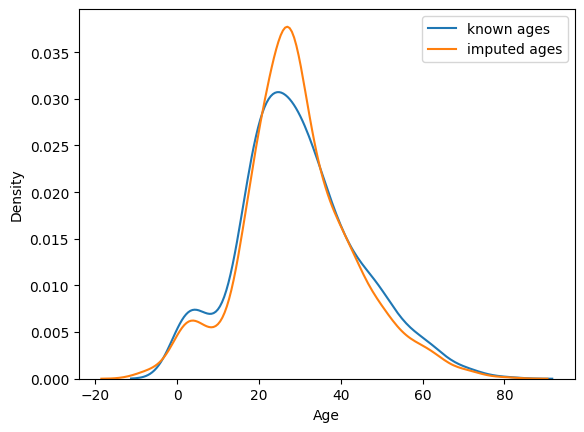

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(titanic_data['Age'][titanic_data['Age'].notnull()], label="known ages")
sns.kdeplot(titanic_data['missing_Age'], label="imputed ages")
plt.legend()
plt.show()

In [81]:
titanic_data['encoded_sex'] = titanic_data['Sex'].map({'male':0,'female':1})

In [82]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  filled_Age   891 non-null    float64
 13  missing_Age  891 non-null    float64
 14  encoded_sex  891 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 104.5+ KB


In [68]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,filled_Age,missing_Age,encoded_sex
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.112424,29.280736,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.304424,13.664284,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,-8.021050,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,21.500000,21.107910,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,26.000000,28.292531,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,36.000000,36.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,1.000000


In [117]:
!pip install faker
import pandas as pd
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Generate synthetic passenger demographics data
def generate_demographics_data(num_records):
    data = []
    for i in range(1, num_records + 1):  # Assuming PassengerId starts at 1
        record = {
            "PassengerId": i,
            "Country": fake.country(),
            "Occupation": fake.job(),
            "Income": random.randint(20000, 150000),  # Random income range
        }
        data.append(record)
    return pd.DataFrame(data)

# Generate and export the synthetic dataset
num_passengers = 891  # Same as the Titanic dataset
passenger_demographics = generate_demographics_data(num_passengers)
passenger_demographics.to_csv('passenger_demographics.csv', index=False)

# Read the synthetic passenger demographics dataset
passenger_demographics = pd.read_csv('passenger_demographics.csv')

# Perform data integration (merge datasets on PassengerId)
integrated_data = pd.merge(titanic_data, passenger_demographics, on='PassengerId', how='left')

# Explore the integrated dataset
print(integrated_data.head())

# Optional: Save the integrated dataset
integrated_data.to_csv('integrated_titanic_data.csv', index=False)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  filled_Age  missing_Age  encoded_sex  \
0      0   7.2500        S        22.0         22.0            0   
1      0  71.2833        C        38.0         38.0            1   
2      0   7.9250        S        26.0         26.0            1   
3      0  53.1000        S        35.0         3

In [118]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  filled_Age   891 non-null    float64
 11  missing_Age  891 non-null    float64
 12  encoded_sex  891 non-null    int64  
 13  Country      891 non-null    object 
 14  Occupation   891 non-null    object 
 15  Income       891 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 111.5+ KB


In [119]:
integrated_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,filled_Age,missing_Age,encoded_sex,Country,Occupation,Income
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,22.0,22.0,0,Benin,Broadcast engineer,20892
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,38.0,38.0,1,Malawi,Lawyer,90753
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,26.0,26.0,1,Honduras,"Production designer, theatre/television/film",49062
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,35.0,35.0,1,Cook Islands,Network engineer,45059
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,35.0,35.0,0,Poland,Sub,142811


In [120]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  filled_Age   891 non-null    float64
 11  missing_Age  891 non-null    float64
 12  encoded_sex  891 non-null    int64  
 13  Country      891 non-null    object 
 14  Occupation   891 non-null    object 
 15  Income       891 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 111.5+ KB


In [121]:
# Remove duplicate rows
titanic_data = titanic_data.drop_duplicates()

# Verify duplicates are removed
print(titanic_data.duplicated().sum())

0


In [122]:
Q1 = integrated_data[['Age', 'Fare', 'SibSp','Parch']].quantile(0.25)
Q3 = integrated_data[['Age', 'Fare', 'SibSp','Parch']].quantile(0.75)
IQR = Q3 - Q1
integrated_data = integrated_data[~((integrated_data[['Age', 'Fare', 'SibSp','Parch']]< (Q1-1.5*IQR) | (integrated_data[['Age', 'Fare', 'SibSp','Parch']]> (Q3+ 1.5*IQR)))).any(axis=1)]

In [123]:
integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 888
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  278 non-null    int64  
 1   Survived     278 non-null    int64  
 2   Pclass       278 non-null    int64  
 3   Name         278 non-null    object 
 4   Sex          278 non-null    object 
 5   Age          238 non-null    float64
 6   SibSp        278 non-null    int64  
 7   Parch        278 non-null    int64  
 8   Fare         278 non-null    float64
 9   Embarked     278 non-null    object 
 10  filled_Age   278 non-null    float64
 11  missing_Age  278 non-null    float64
 12  encoded_sex  278 non-null    int64  
 13  Country      278 non-null    object 
 14  Occupation   278 non-null    object 
 15  Income       278 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 36.9+ KB


### **Comprehensive Rundown of Data Cleaning and Preprocessing Steps**

#### **1. Data Inspection**
- Load the dataset and inspect the first few rows:
  ```python
  print(data.head())
  print(data.info())
  ```
- Identify missing values and data types.

---

#### **2. Handle Missing Values**
- **Remove Missing Data:**
  - Drop rows or columns with missing values.
    ```python
    data.dropna(inplace=True)  # Removes rows with any missing values
    data.drop(columns=['column_name'], inplace=True)  # Drops specific columns
    ```

- **Impute Missing Values:**
  - Replace with mean, median, mode, or a constant.
    ```python
    data['Age'] = data['Age'].fillna(data['Age'].mean())
    data['Category'] = data['Category'].fillna('Unknown')
    ```
  - Use regression or machine learning for imputation.
  - Use forward-fill or backward-fill for time-series data.
    ```python
    data['Value'] = data['Value'].fillna(method='ffill')  # Forward fill
    ```

---

#### **3. Handle Duplicates**
- Check for duplicate rows and remove them:
  ```python
  print(data.duplicated().sum())
  data.drop_duplicates(inplace=True)
  ```

---

#### **4. Handle Outliers**
- **Identify Outliers:**
  - Use statistical methods (e.g., IQR, Z-score).
    ```python
    Q1 = data['column'].quantile(0.25)
    Q3 = data['column'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (data['column'] < (Q1 - 1.5 * IQR)) | (data['column'] > (Q3 + 1.5 * IQR))
    ```

- **Handle Outliers:**
  - Remove, cap, or transform outliers.
    ```python
    data['column'] = np.clip(data['column'], lower_bound, upper_bound)
    ```

---

#### **5. Standardize Column Names**
- Clean and standardize column names for consistency.
  ```python
  data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
  ```

---

#### **6. Encode Categorical Data**
- **Label Encoding:**
  - Convert categories to numeric labels.
    ```python
    from sklearn.preprocessing import LabelEncoder
    data['Category'] = LabelEncoder().fit_transform(data['Category'])
    ```

- **One-Hot Encoding:**
  - Convert categories into binary columns.
    ```python
    data = pd.get_dummies(data, columns=['Category'], drop_first=True)
    ```

---

#### **7. Scale and Normalize Numerical Features**
- **Normalization (Min-Max Scaling):**
  - Scale data to range `[0, 1]`.
    ```python
    from sklearn.preprocessing import MinMaxScaler
    data[['column']] = MinMaxScaler().fit_transform(data[['column']])
    ```

- **Standardization (Z-Score Scaling):**
  - Rescale data to have mean `0` and standard deviation `1`.
    ```python
    from sklearn.preprocessing import StandardScaler
    data[['column']] = StandardScaler().fit_transform(data[['column']])
    ```

---

#### **8. Transform Data**
- Apply transformations to correct data distributions:
  - **Log Transformation:**
    ```python
    data['column'] = np.log1p(data['column'])
    ```
  - **Box-Cox Transformation:** For normalizing data.
    ```python
    from scipy.stats import boxcox
    data['column'], _ = boxcox(data['column'])
    ```

---

#### **9. Feature Engineering**
- **Create New Features:**
  - Extract new information from existing data (e.g., `FamilySize = SibSp + Parch + 1`).
    ```python
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    ```

- **Transform Text Columns:**
  - Extract parts of strings or clean text.
    ```python
    data['LastName'] = data['Name'].str.split(',').str[0]
    ```

- **Bin Numerical Data:**
  - Group numeric data into bins.
    ```python
    data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 50, 80], labels=['Child', 'Adult', 'Senior'])
    ```

---

#### **10. Combine or Split Data**
- Combine multiple datasets using `merge`, `join`, or `concat`.
  ```python
  data = pd.merge(data1, data2, on='common_key', how='inner')
  ```

- Split columns or extract components:
  ```python
  data[['FirstName', 'LastName']] = data['Name'].str.split(' ', 1, expand=True)
  ```

---

#### **11. Handle Dates and Times**
- Convert date columns to datetime format.
  ```python
  data['date'] = pd.to_datetime(data['date'])
  ```

- Extract useful components (e.g., year, month, day).
  ```python
  data['year'] = data['date'].dt.year
  ```

---

#### **12. Reduce Dimensionality**
- Use techniques like **Principal Component Analysis (PCA)** for feature reduction.
  ```python
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)
  reduced_data = pca.fit_transform(data[numeric_columns])
  ```

---

#### **13. Aggregate Data**
- Summarize data by grouping and aggregating:
  ```python
  aggregated_data = data.groupby('column').mean()
  ```

---

#### **14. Remove Irrelevant Features**
- Drop features that are not useful or redundant.
  ```python
  data.drop(columns=['irrelevant_column'], inplace=True)
  ```

---

#### **15. Handle Imbalanced Data**
- Use techniques like oversampling (SMOTE) or undersampling for class imbalance.
  ```python
  from imblearn.over_sampling import SMOTE
  X_resampled, y_resampled = SMOTE().fit_resample(X, y)
  ```

---

#### **16. Verify and Save Cleaned Data**
- Validate the dataset for consistency:
  ```python
  print(data.isnull().sum())
  print(data.describe())
  ```
- Save the cleaned dataset:
  ```python
  data.to_csv('cleaned_data.csv', index=False)
  ```

---

